## <span style='color:#4B0082'> Let's have some fun. A simple paint using trackbars.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

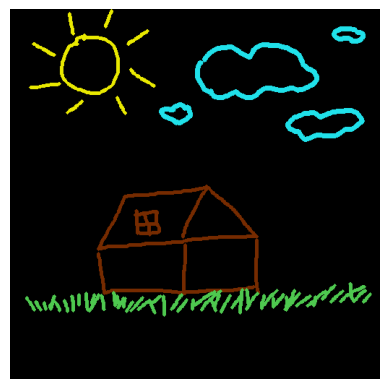

In [6]:
# Slider maximum values
Blue_slider_max = 255
Red_slider_max = 255
Green_slider_max = 255
Pen_size_slider_max = 100

# Initialize the image and variables
img = np.zeros((512, 512, 3), np.uint8)
title_window = 'image'
Blue, Green, Red, Pen_size = 0, 0, 0, 1  # Default values

# Trackbar callback functions
def on_trackbar_blue(val):
    global Blue
    Blue = val

def on_trackbar_red(val):
    global Red
    Red = val

def on_trackbar_green(val):
    global Green
    Green = val

def on_trackbar_pen_size(val):
    global Pen_size
    Pen_size = val / Pen_size_slider_max * 20  # Scale pen size for better usability

# Create trackbars
cv2.namedWindow(title_window)
cv2.createTrackbar('Blue', title_window, 0, Blue_slider_max, on_trackbar_blue)
cv2.createTrackbar('Red', title_window, 0, Red_slider_max, on_trackbar_red)
cv2.createTrackbar('Green', title_window, 0, Green_slider_max, on_trackbar_green)
cv2.createTrackbar('Pen size', title_window, 0, Pen_size_slider_max, on_trackbar_pen_size)

drawing = False  # true if mouse is pressed
last_point = None  # To store the last point drawn

# Mouse callback function
def brush(event, x, y, flags, param):
    global drawing, last_point
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)  # Store the starting point
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            if last_point is not None:
                # Draw a line from the last point to the current point
                cv2.line(img, last_point, (x, y), (Blue, Green, Red), int(Pen_size))
            last_point = (x, y)  # Update the last point
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        last_point = None  # Reset last point when mouse button is released

# Set mouse callback function
cv2.setMouseCallback(title_window, brush)

while True:
    cv2.imshow(title_window, img)
    if cv2.waitKey(1) & 0xFF == 27:  # Escape key to exit
        break

cv2.destroyAllWindows()

# Show the final image using matplotlib (optional)
plt.imshow(img[..., ::-1])
plt.axis('off')  # Hide axis
plt.show()